In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.dates as mdates
import numpy as np
import datetime

In [0]:
nfile= '/content/20190101_20191231_Huancayo-IGP'

In [23]:
data = pd.read_csv(nfile, sep=",", skiprows=6, na_values= -999.0)
data

Date(dd:mm:yyyy)  ... Exact_Wavelengths_of_AOD(um)_Empty.4
0           01:01:2019  ...                                  NaN
1           01:01:2019  ...                                  NaN
2           01:01:2019  ...                                  NaN
3           01:01:2019  ...                                  NaN
4           01:01:2019  ...                                  NaN
...                ...  ...                                  ...
19385       02:12:2019  ...                                  NaN
19386       02:12:2019  ...                                  NaN
19387       02:12:2019  ...                                  NaN
19388       02:12:2019  ...                                  NaN
19389       02:12:2019  ...                                  NaN

[19390 rows x 113 columns]

In [24]:
#data['fecha']= pd.to_datetime(data[['year','month','day']])
data.dtypes #data.columns 
fecha1= pd.to_datetime(data[data.columns[0]], format="%d:%m:%Y") #str(data[data.columns[0]].values).split(':')
fecha2= pd.to_datetime(data[data.columns[1]], format="%H:%M:%S")

fecha= pd.DataFrame(fecha1)
fecha= fecha.assign(**{fecha2.name: fecha2})
fecha

Date(dd:mm:yyyy)      Time(hh:mm:ss)
0           2019-01-01 1900-01-01 16:50:28
1           2019-01-01 1900-01-01 16:56:28
2           2019-01-01 1900-01-01 16:59:27
3           2019-01-01 1900-01-01 17:05:28
4           2019-01-01 1900-01-01 17:17:27
...                ...                 ...
19385       2019-12-02 1900-01-01 16:45:23
19386       2019-12-02 1900-01-01 16:48:23
19387       2019-12-02 1900-01-01 16:51:23
19388       2019-12-02 1900-01-01 19:06:22
19389       2019-12-02 1900-01-01 19:09:22

[19390 rows x 2 columns]

In [0]:
list_fecha=list( map( lambda x: pd.to_datetime(fecha[fecha.columns[0]][x]) 
                                + datetime.timedelta(hours= int(fecha[fecha.columns[1]][x].strftime('%H')),
                                                    minutes= int(fecha[fecha.columns[1]][x].strftime('%M')),
                                                    seconds= int(fecha[fecha.columns[1]][x].strftime('%S')) 
                                                    ) 
                    , np.arange(len(fecha)).tolist() 
                    ) 
                )
#fecha.apply(lambda)

In [26]:
data.drop(data.columns[0:2], axis=1,inplace=True)
data['fecha']=list_fecha
data = data.set_index('fecha')
data

Day_of_Year  ...  Exact_Wavelengths_of_AOD(um)_Empty.4
fecha                             ...                                      
2019-01-01 16:50:28            1  ...                                   NaN
2019-01-01 16:56:28            1  ...                                   NaN
2019-01-01 16:59:27            1  ...                                   NaN
2019-01-01 17:05:28            1  ...                                   NaN
2019-01-01 17:17:27            1  ...                                   NaN
...                          ...  ...                                   ...
2019-12-02 16:45:23          336  ...                                   NaN
2019-12-02 16:48:23          336  ...                                   NaN
2019-12-02 16:51:23          336  ...                                   NaN
2019-12-02 19:06:22          336  ...                                   NaN
2019-12-02 19:09:22          336  ...                                   NaN

[19390 rows x 111 columns]

In [27]:
for i in list(data.columns):
  print(i)

Day_of_Year
Day_of_Year(Fraction)
AOD_1640nm
AOD_1020nm
AOD_870nm
AOD_865nm
AOD_779nm
AOD_675nm
AOD_667nm
AOD_620nm
AOD_560nm
AOD_555nm
AOD_551nm
AOD_532nm
AOD_531nm
AOD_510nm
AOD_500nm
AOD_490nm
AOD_443nm
AOD_440nm
AOD_412nm
AOD_400nm
AOD_380nm
AOD_340nm
Precipitable_Water(cm)
AOD_681nm
AOD_709nm
AOD_Empty
AOD_Empty.1
AOD_Empty.2
AOD_Empty.3
AOD_Empty.4
Triplet_Variability_1640
Triplet_Variability_1020
Triplet_Variability_870
Triplet_Variability_865
Triplet_Variability_779
Triplet_Variability_675
Triplet_Variability_667
Triplet_Variability_620
Triplet_Variability_560
Triplet_Variability_555
Triplet_Variability_551
Triplet_Variability_532
Triplet_Variability_531
Triplet_Variability_510
Triplet_Variability_500
Triplet_Variability_490
Triplet_Variability_443
Triplet_Variability_440
Triplet_Variability_412
Triplet_Variability_400
Triplet_Variability_380
Triplet_Variability_340
Triplet_Variability_Precipitable_Water(cm)
Triplet_Variability_681
Triplet_Variability_709
Triplet_Variability_AO

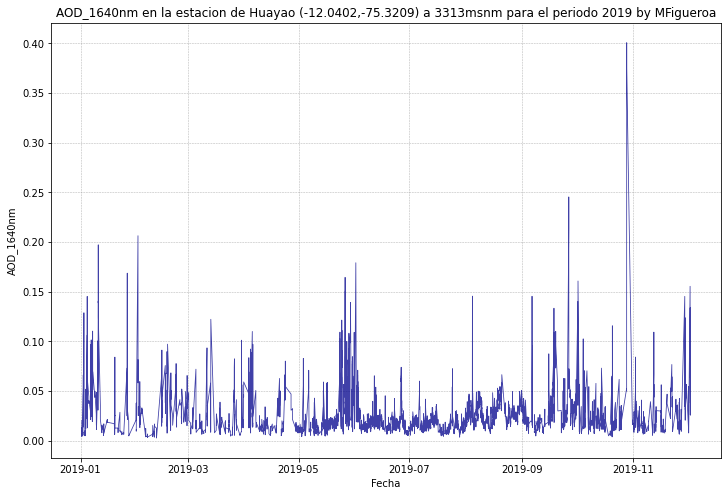

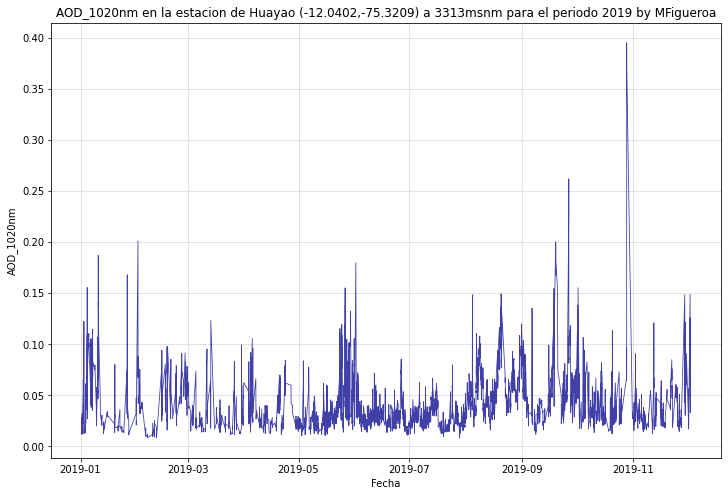

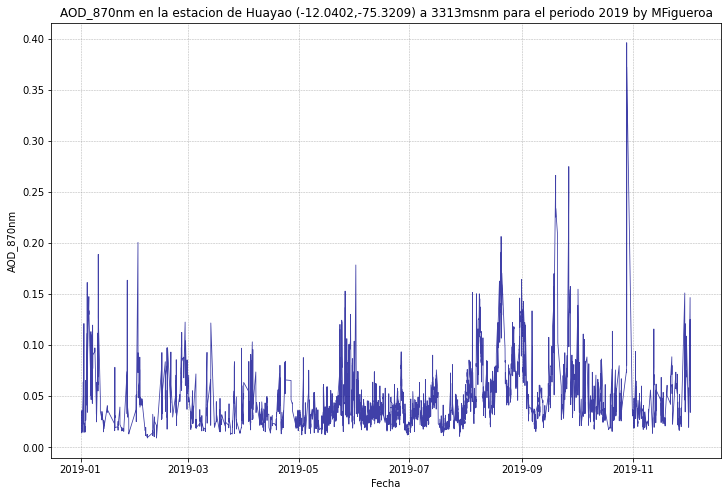

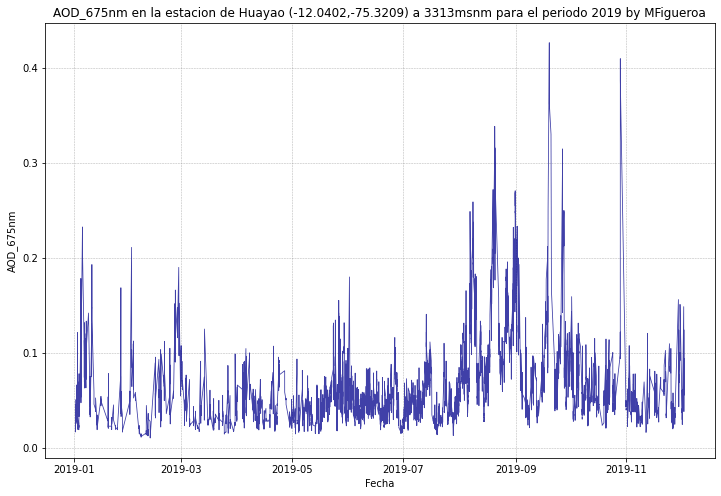

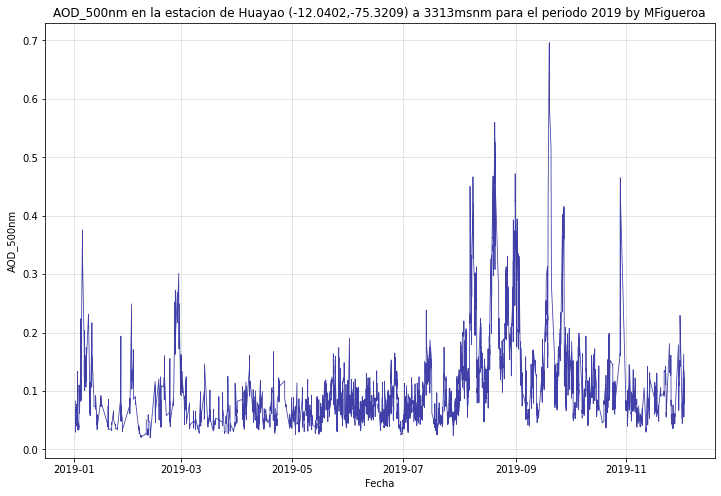

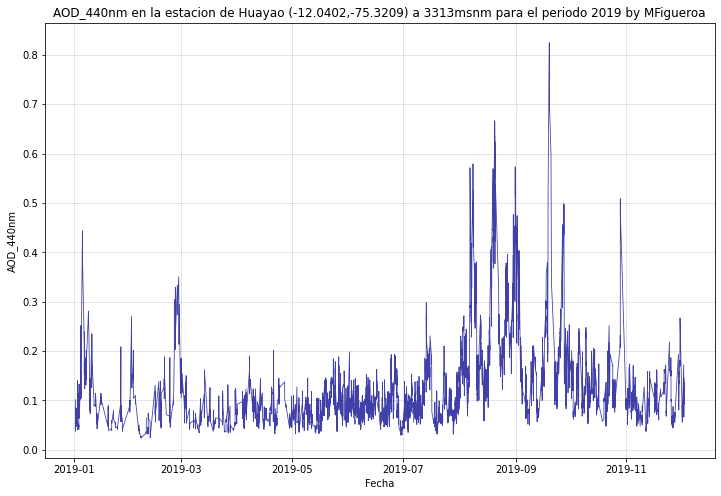

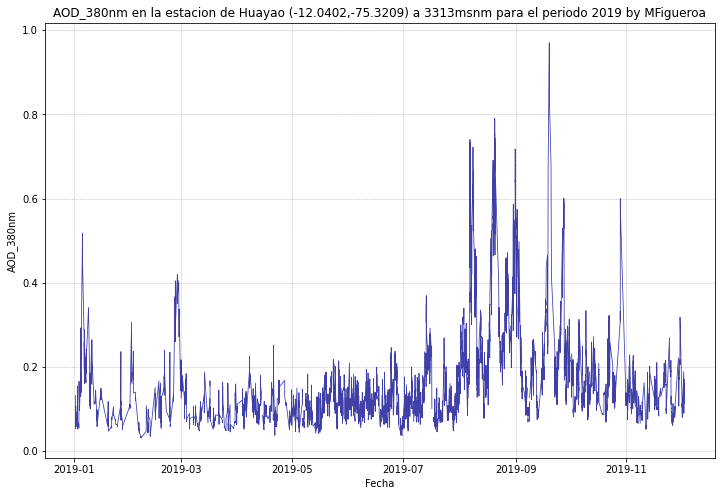

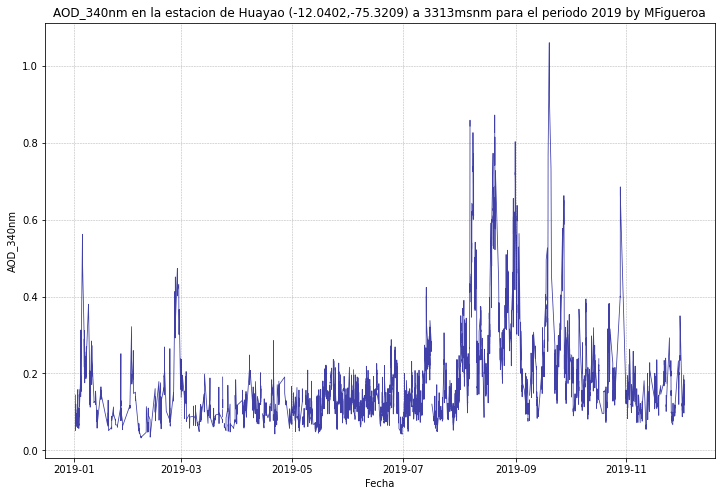

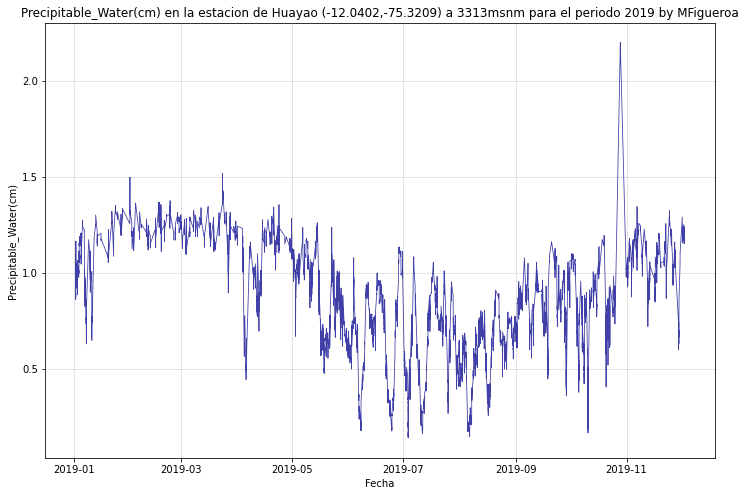

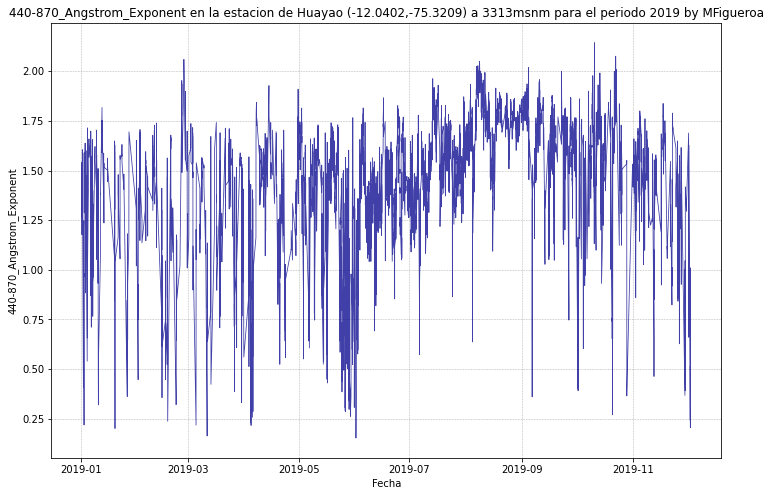

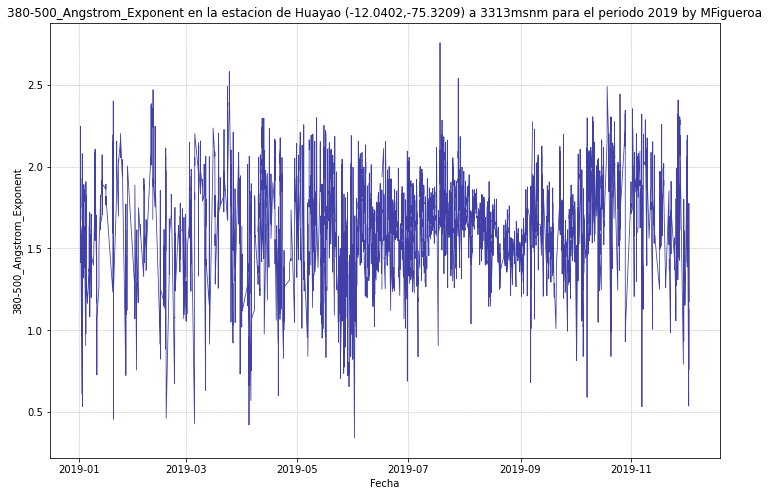

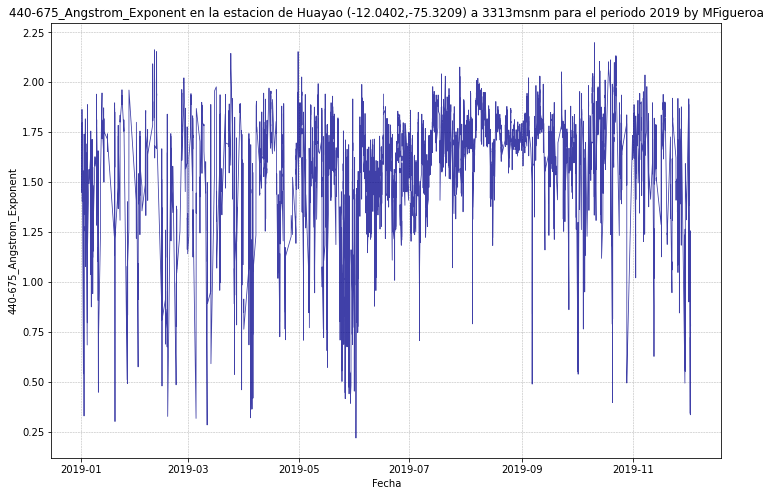

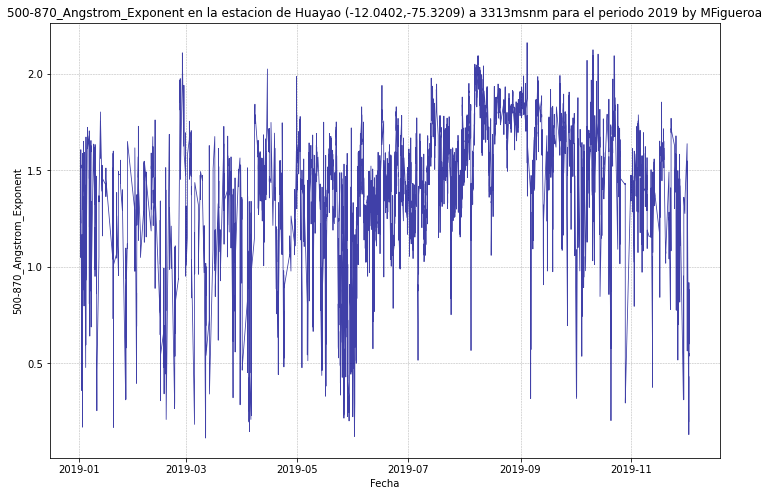

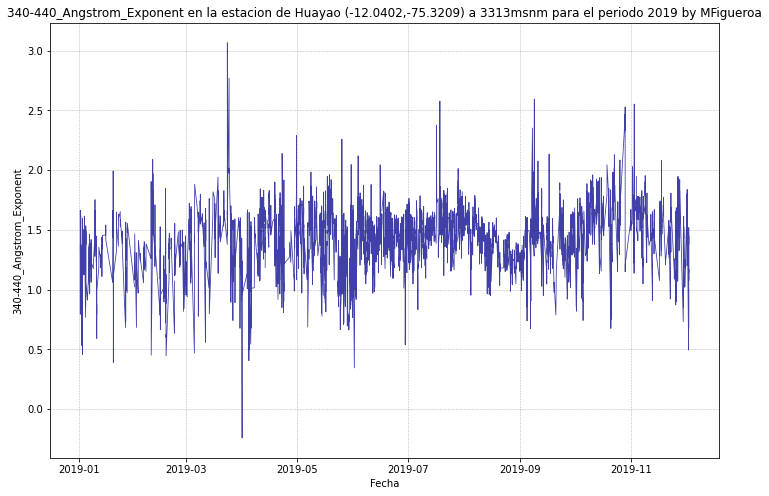

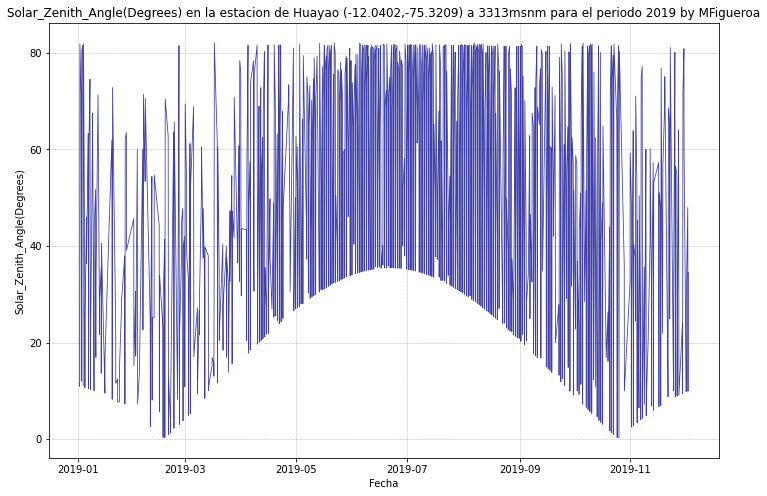

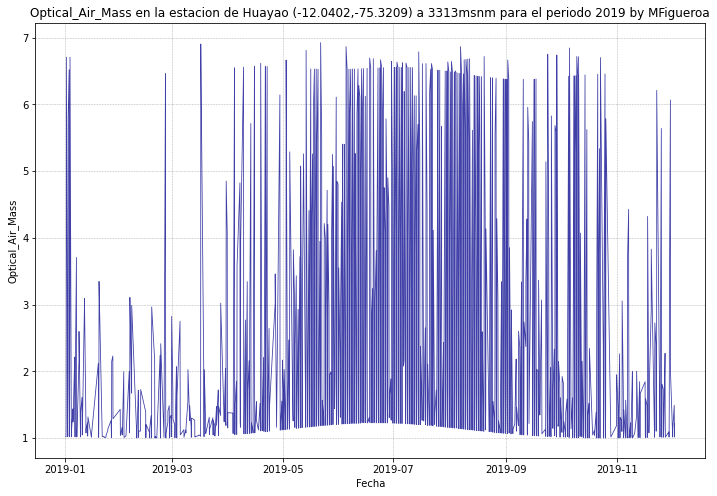

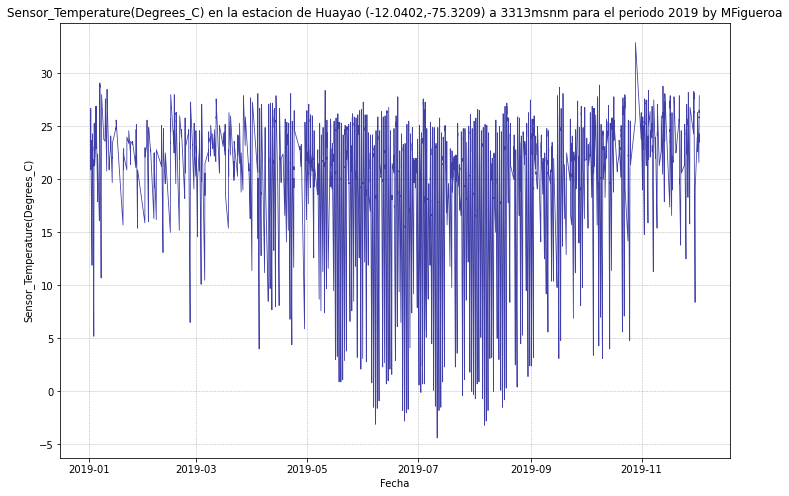

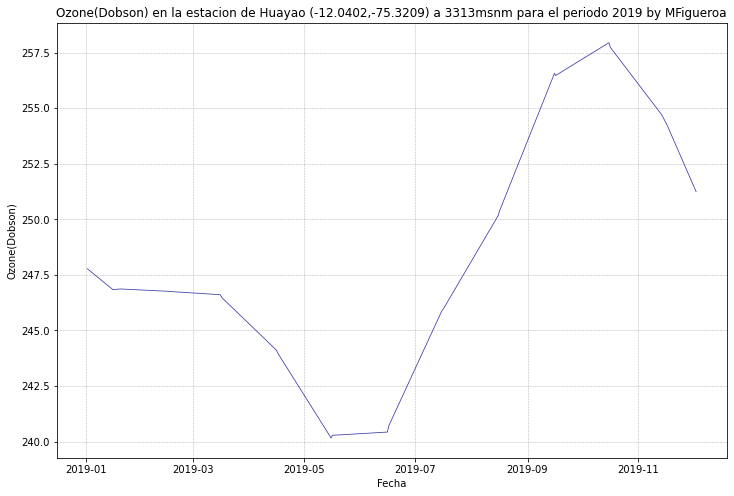

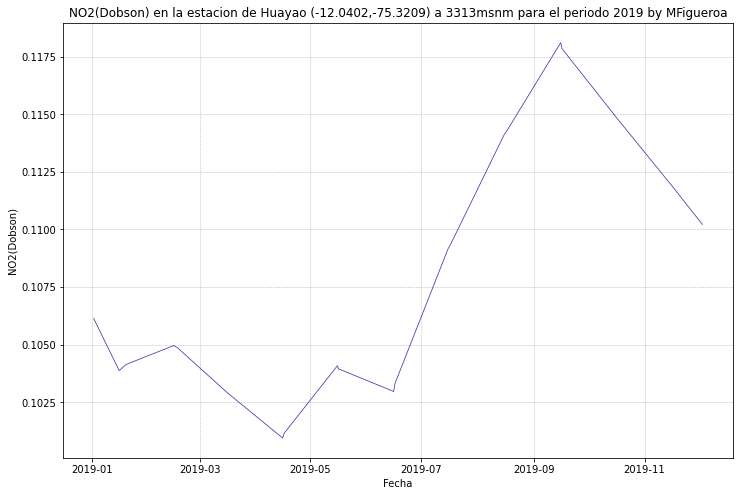

In [54]:

names=[ 'AOD_1640nm',
'AOD_1020nm',
'AOD_870nm',
# 'AOD_865nm',
# 'AOD_779nm',
'AOD_675nm',
# 'AOD_667nm',
# 'AOD_620nm',
# 'AOD_560nm',
# 'AOD_555nm',
# 'AOD_551nm',
# 'AOD_532nm',
# 'AOD_531nm',
# 'AOD_510nm',
'AOD_500nm',
# 'AOD_490nm',
# 'AOD_443nm',
'AOD_440nm',
# 'AOD_412nm',
# 'AOD_400nm',
'AOD_380nm',
'AOD_340nm',
'Precipitable_Water(cm)',
# 'AOD_681nm',
# 'AOD_709nm',
'440-870_Angstrom_Exponent',
'380-500_Angstrom_Exponent',
'440-675_Angstrom_Exponent',
'500-870_Angstrom_Exponent',
'340-440_Angstrom_Exponent',
# '440-675_Angstrom_Exponent[Polar]',
'Solar_Zenith_Angle(Degrees)',
'Optical_Air_Mass',
'Sensor_Temperature(Degrees_C)',
'Ozone(Dobson)',
'NO2(Dobson)']



def figurita(data, col= None):
  fig = plt.figure(figsize=(12,8)) # ax= plt.gca()
  ax = fig.add_subplot(111)

  ax.plot(data[col], 'darkblue', linewidth=0.8, alpha=0.75)

  ax.grid(color='gray', alpha=0.6, linestyle='dashed', linewidth=0.5)
  ax.set_ylabel(col)
  ax.set_xlabel('Fecha')
  ax.set_title( col+' en la estacion de Huayao ('+ str(data['Site_Latitude(Degrees)'][0])+ ','+  str(data['Site_Longitude(Degrees)'][0])+ ') a '+str(int(data['Site_Elevation(m)'][0])) +'msnm para el periodo '+data.index[0].strftime('%Y')+' by MFigueroa')

for i in list(names):
  figurita(data,i)